## CruzK & Mangalus LabEx 2

In [1]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Data Profiling

In [2]:
df = pd.read_excel("marketing_data.xlsx")

In [3]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,2014-11-05 00:00:00,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,2014-08-04 00:00:00,0,6,...,11,0,34,2,3,1,2,7,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,2013-07-03 00:00:00,99,372,...,47,48,78,2,5,2,11,4,0,0
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/13,99,5,...,3,8,16,1,1,0,3,8,0,0
2237,22,1976,Graduation,Divorced,46310.0,1,0,2012-03-12 00:00:00,99,185,...,15,5,14,2,6,1,5,8,0,0
2238,528,1978,Graduation,Married,65819.0,0,0,11/29/12,99,267,...,149,165,63,1,5,4,10,3,0,0


In [4]:
df.shape

(2240, 22)

In [5]:
print('Number of Unique Values for Each Column')
unique_values_per_column = df.apply(lambda x: x.nunique())
print(unique_values_per_column)

Number of Unique Values for Each Column
ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
Response                  2
Complain                  2
dtype: int64


In [6]:
#Identifying Unique Values for all Records
for i in df.columns:
    x = df[i]
    print(f'{i}: {x.dtype}')
    print(f'{x.shape[0]} elements with {x.nunique()} unique elements')
    print(x.unique())
    print('--------------------------------------------------')
    print()

ID: int64
2240 elements with 2240 unique elements
[ 1826     1 10476 ...    22   528  4070]
--------------------------------------------------

Year_Birth: int64
2240 elements with 59 unique elements
[1970 1961 1958 1967 1989 1954 1947 1979 1959 1981 1969 1977 1960 1966
 1976 1965 1956 1975 1971 1986 1972 1974 1990 1987 1984 1968 1955 1983
 1973 1978 1952 1962 1964 1982 1963 1957 1980 1945 1949 1948 1953 1946
 1985 1992 1944 1951 1988 1950 1994 1993 1991 1893 1996 1995 1899 1943
 1941 1940 1900]
--------------------------------------------------

Education: object
2240 elements with 5 unique elements
['Graduation' 'PhD' '2n Cycle' 'Master' 'Basic']
--------------------------------------------------

Marital_Status: object
2240 elements with 8 unique elements
['Divorced' 'Single' 'Married' 'Together' 'Widow' 'YOLO' 'Alone' 'Absurd']
--------------------------------------------------

Income: float64
2240 elements with 1974 unique elements
[84835. 57091. 67267. ... 46310. 65819. 94871.]


In [7]:
print('Null Values for each Column')
df.isnull().sum()

Null Values for each Column


ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Response                0
Complain                0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [9]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.149107,0.009375
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.356274,0.096391
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000


In [10]:
print('Statistical Analysis of Income Column')
df['Income'].describe()

Statistical Analysis of Income Column


count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

In [11]:
print('Lowest Income: ', df['Income'].min())
print('Highest Income: ', df['Income'].max())

Lowest Income:  1730.0
Highest Income:  666666.0


### Exploratory Data Analysis

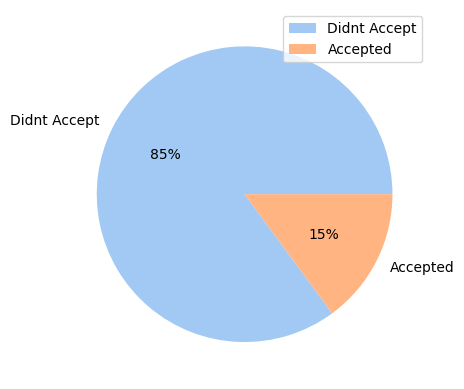

In [12]:
colors = sns.color_palette('pastel')[0:len(df['Response'].value_counts())]

#create pie chart
plt.pie(df['Response'].value_counts(), labels=['Didnt Accept', 'Accepted'], colors = colors, autopct='%.0f%%')
plt.legend()
plt.show()

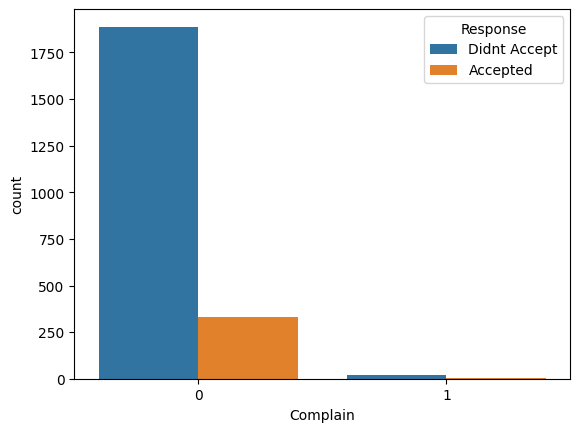

In [13]:

df['Response'] = df['Response'].replace({0: 'Didnt Accept', 1: 'Accepted'})

# Create a bar plot
sns.barplot(x='Complain', y='count', hue='Response', 
            data=df[['Complain', 'Response']].value_counts().reset_index())

# Show plot
plt.show()

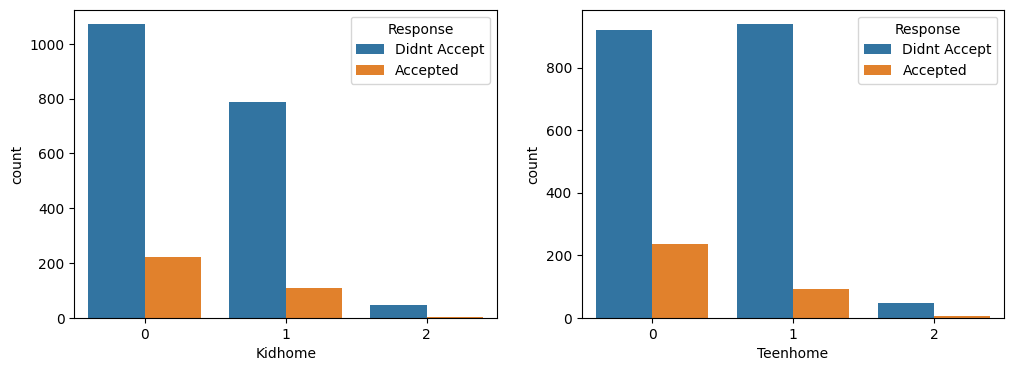

In [14]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(12, 4))

for i, ax, col in zip(range(2), axes.flat, ['Kidhome', 'Teenhome']):
    tmp = df[[col, 'Response']].value_counts().to_frame().reset_index()
    tmp['Response'] = tmp['Response'].replace({0: 'Didnt Accept', 1: 'Accepted'})

    sns.barplot(x = col, y='count', 
                   hue = 'Response',data=tmp, ax=ax)
    
plt.show()

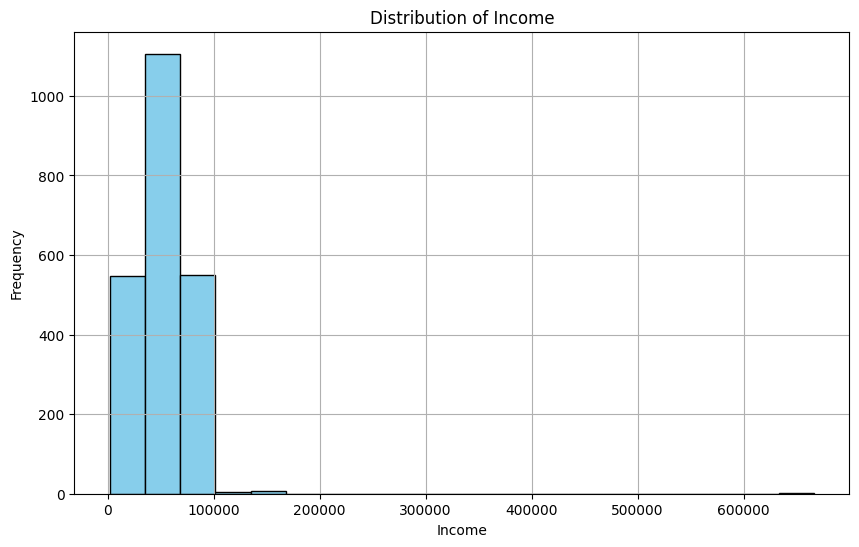

In [15]:
# Filter data for visualization
income_data = df['Income']

# Create histogram
plt.figure(figsize=(10, 6))
plt.hist(income_data, bins=20, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Distribution of Income')

# Add grid
plt.grid(True)

# Show plot
plt.show()

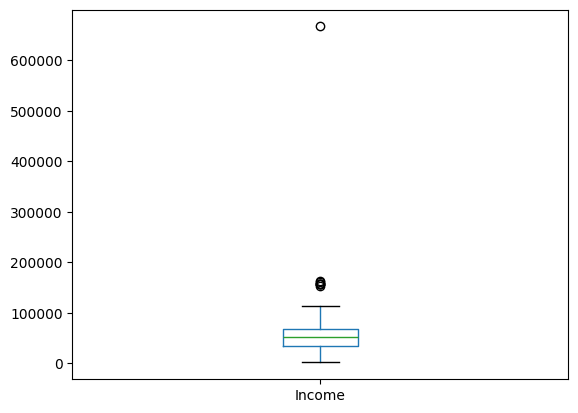

In [16]:
#Outlier Detection Using Boxplot
def plot_boxplot(df,ft):
    df.boxplot(column=[ft])
    plt.grid(False)
    plt.show()

plot_boxplot(df, "Income")

In [17]:
#outlier in income detected???

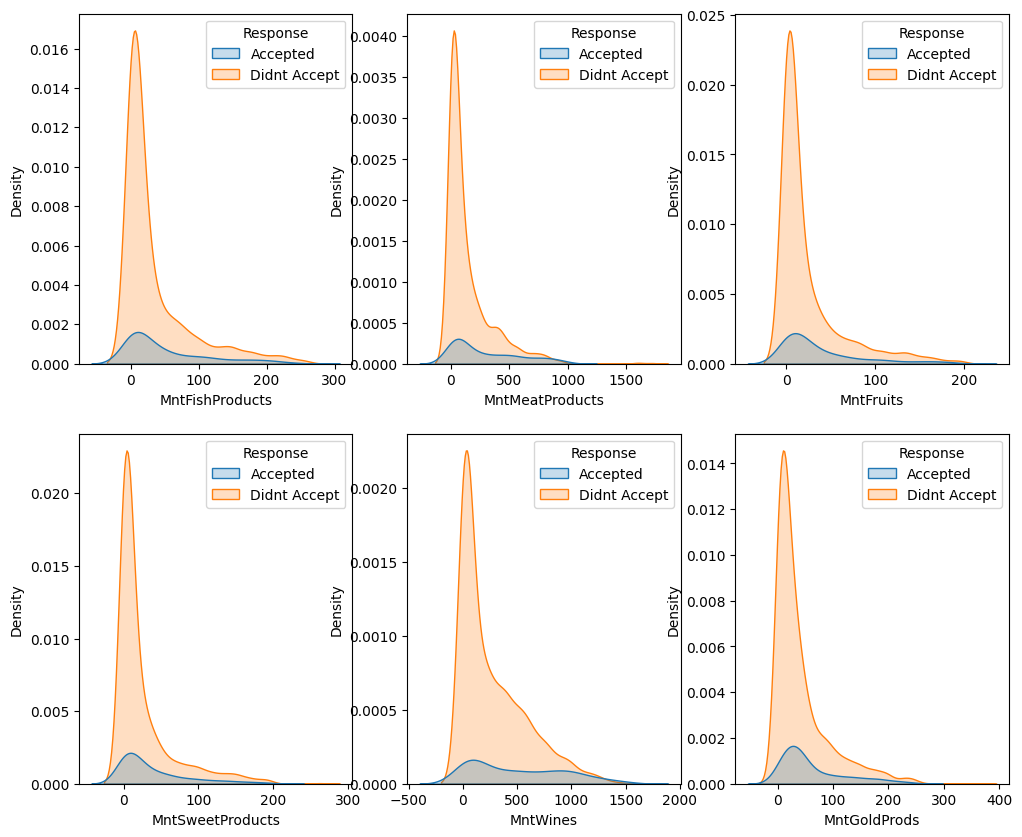

In [22]:
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(12, 10))

for i, ax, col in zip(range(6), axes.flat, ['MntFishProducts', 'MntMeatProducts', 'MntFruits', 'MntSweetProducts', 'MntWines', 'MntGoldProds']):
    sns.kdeplot(df, x=col, hue='Response', fill=True, ax=ax)
    
plt.show()

#this will show if products purchased by customers contribute on their response

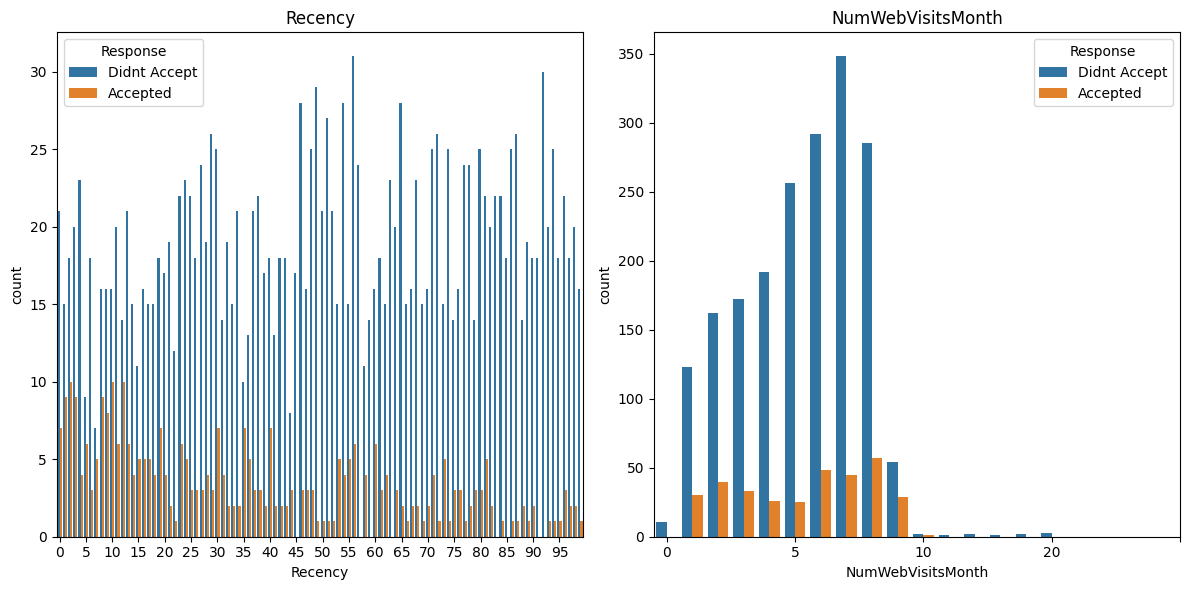

In [24]:
#Checking if people who availed are based on their visits to the supermarket. 
# Replace 0 and 1 with corresponding labels
df['Response'] = df['Response'].replace({0: 'Didnt Accept', 1: 'Accepted'})

# Create figure and axes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot for the Recency column
sns.barplot(x='Recency', y='count', hue='Response', 
            data=df[['Recency', 'Response']].value_counts().reset_index(), ax=axes[0])
axes[0].set_xticks(range(0, max(df['Recency'])+1, 5))
axes[0].set_title('Recency')

# Plot for the NumWebVisitsMonth column
sns.barplot(x='NumWebVisitsMonth', y='count', hue='Response', 
            data=df[['NumWebVisitsMonth', 'Response']].value_counts().reset_index(), ax=axes[1])
axes[1].set_xticks(range(0, max(df['NumWebVisitsMonth'])+1, 5))
axes[1].set_title('NumWebVisitsMonth')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


In [25]:
#mas onti ang accepted sa mga matagal na di nag vivisit ng store. 

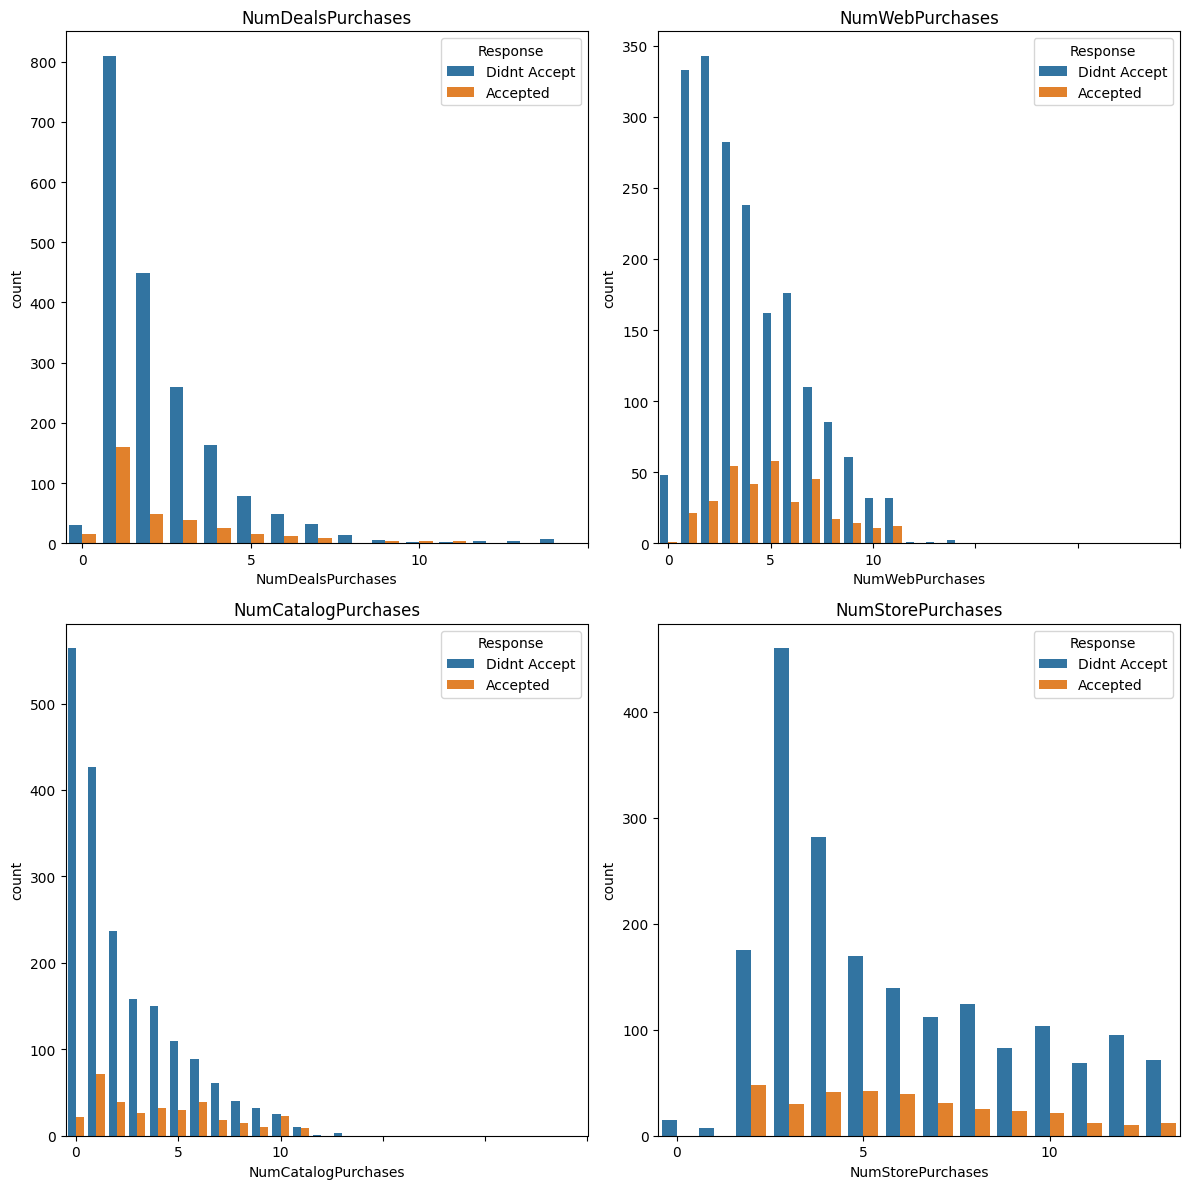

In [21]:
# Replace 0 and 1 with corresponding labels
df['Response'] = df['Response'].replace({0: 'Didnt Accept', 1: 'Accepted'})

# List of columns to create plots for
columns = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']

# Create a 3x2 subplot grid
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))

# Flatten the axes array to iterate over it easily
axes = axes.flatten()

# Iterate over columns and plot on corresponding axes
for ax, column in zip(axes, columns):
    sns.barplot(x=column, y='count', hue='Response', 
                data=df[[column, 'Response']].value_counts().reset_index(), ax=ax)
    ax.set_xticks(range(0, max(df[column])+1, 5))
    ax.set_title(column)

# Adjust layout
plt.tight_layout()
# Show plot
plt.show()

#this will show if purchase type made by customers contribute on their response